<a href="https://colab.research.google.com/github/FabrizioBettetti/Machine-learning/blob/main/Tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.23607191]
 [-3.0102882 ]
 [-0.48107672]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8585124 ]
 [0.10485065]
 [0.30955243]], shape=(3, 1), dtype=float32)


In [6]:
import numpy as np

In [7]:
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [8]:
#x = tf.ones(shape=(2, 2))
#x[0, 0] = 0.

#Error:
#TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))   #Default: mean = 0, standard deviation = 1
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.20675611],
       [-0.2979841 ],
       [-0.5598262 ]], dtype=float32)>


In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [13]:
a = tf.add(tf.ones((2, 2)), tf.ones((2, 2)))
print(a)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [14]:
b = tf.square(a)
print(b)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [15]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)


In [16]:
d = b + c
print(d)

tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)


In [17]:
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [18]:
e *= d   #Element-wise
print(e)

tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


In [19]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)   #Track a constant (default: variables tracked only)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [21]:
x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [22]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [23]:
W = tf.Variable(tf.zeros((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.ones((2, 2))
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [24]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2   #1/2 g t^2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


##Linear classifier from scratch

In [25]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [26]:
negative_samples.shape, positive_samples.shape   #1000 points (x1, x2)

((1000, 2), (1000, 2))

In [27]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [28]:
inputs.shape

(2000, 2)

In [31]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),   #negative_samples: class 0
                     np.ones((num_samples_per_class, 1), dtype="float32")))   #positive_samples: class 1

In [32]:
targets.shape

(2000, 1)

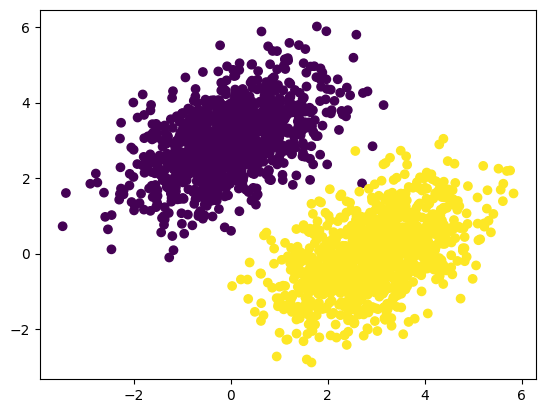

In [33]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [34]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [35]:
def model(inputs):
  return tf.matmul(inputs, W) + b   #x1 w1 + x2 w2 + b

In [36]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)   #Element-wise
  return tf.reduce_mean(per_sample_losses)

In [37]:
learning_rate = 0.1

def training_step(inputs, targets):
  #Forward pass
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  #Backward pass
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)
  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f'loss at step {step}: {loss:.4f}')